<a href="https://colab.research.google.com/github/Sarah-0405/Coldspots_Bayern_Analyse/blob/main/Plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Notebook enthält verschiedene im Paper enthaltene Plots

# Karte aller Untersuchungsstädte innerhalb Bayerns

input: Grenzen Städte, Grenze Bayern; Hintergrundkarte: Esri World Topo Map

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import geopandas as gpd

In [ ]:
staedte_grenzen = gpd.read_file("/content/drive/MyDrive/Cold Spots Bayern/grenzen_ueber_50tsd.gpkg")

In [ ]:
print(staedte_grenzen)

    bbox_west  bbox_south  bbox_east  bbox_north   place_id  osm_type  \
0   11.360777   48.061624  11.722910   48.248116  116687199  relation   
1   10.988733   49.331434  11.282596   49.540753  115962439  relation   
2   10.763362   48.258144  10.959333   48.458654  116219980  relation   
3   12.029075   48.966746  12.191608   49.076416  119951011  relation   
4   11.255908   48.683877  11.503422   48.822891  116627625  relation   
5    9.871628   49.710684  10.014429   49.845462  114380407  relation   
6   10.893157   49.435989  11.028660   49.541254  114858422  relation   
7   10.915363   49.532709  11.053604   49.645584  115229825  relation   
8   10.826504   49.842646  10.960705   49.928633  116040976  relation   
9   11.475118   49.888194  11.672826   49.977259  116015980  relation   
10   9.080245   49.920061   9.238003   50.021279  114582189  relation   
11  12.018216   48.507002  12.284489   48.595594  117437425  relation   
12  10.232656   47.694585  10.378058   47.777952   

In [ ]:
# Load the shapefile containing all German states
bundeslaender_grenzen = gpd.read_file("/content/drive/MyDrive/Cold Spots Bayern/bundeslaender_grenzen/VG5000_LAN.shp")

print(bundeslaender_grenzen.head())

              OBJID     BEGINN  ADE  GF  BSG ARS AGS       SDV_ARS  \
0  DEBKGVG500000CSU 2021-06-20    2   9    1  01  01  010020000000   
1  DEBKGVG500000CSV 2019-10-04    2   9    1  02  02  020000000000   
2  DEBKGVG500000CSW 2019-10-04    2   9    1  03  03  032410001001   
3  DEBKGVG500000CSX 2019-10-04    2   9    1  04  04  040110000000   
4  DEBKGVG500000CSY 2021-06-20    2   9    1  05  05  051110000000   

                   GEN                   BEZ  ...  SN_K SN_V1 SN_V2 SN_G  \
0   Schleswig-Holstein                  Land  ...    00    00    00  000   
1              Hamburg  Freie und Hansestadt  ...    00    00    00  000   
2        Niedersachsen                  Land  ...    00    00    00  000   
3               Bremen      Freie Hansestadt  ...    00    00    00  000   
4  Nordrhein-Westfalen                  Land  ...    00    00    00  000   

  FK_S3 NUTS         ARS_0     AGS_0        WSK  \
0     0  DEF  010000000000  01000000 2012-02-01   
1     0  DE6  020000

**Subtask:** Create the base map with Bavaria outline and LST layer.

**Reasoning:**
Plot the Bavaria outline as the base layer with a dark gray color. Then, add the LST data from `mean_lst_all_cities` as a heatmap on top, using a blue-to-red colormap.

In [ ]:
bayern_grenze = bundeslaender_grenzen[bundeslaender_grenzen['GEN'] == 'Bayern']


In [ ]:
display(bayern_grenze)

,OBJID,BEGINN,ADE,GF,BSG,ARS,AGS,SDV_ARS,GEN,BEZ,...,SN_K,SN_V1,SN_V2,SN_G,FK_S3,NUTS,ARS_0,AGS_0,WSK,geometry
8,DEBKGVG500000CT2,2020-11-08,2,9,1,09,09,091620000000,Bayern,Freistaat,...,00,00,00,000,0,DE2,090000000000,09000000,2011-07-01,"POLYGON ((3609423.374 5269564.114, 3611533.108..."


In [ ]:
bayern_grenze = bayern_grenze.to_crs(epsg=4326)

# Verify the CRS has been updated
print("New CRS of bayern_grenze:", bayern_grenze.crs)

New CRS of bayern_grenze: EPSG:4326


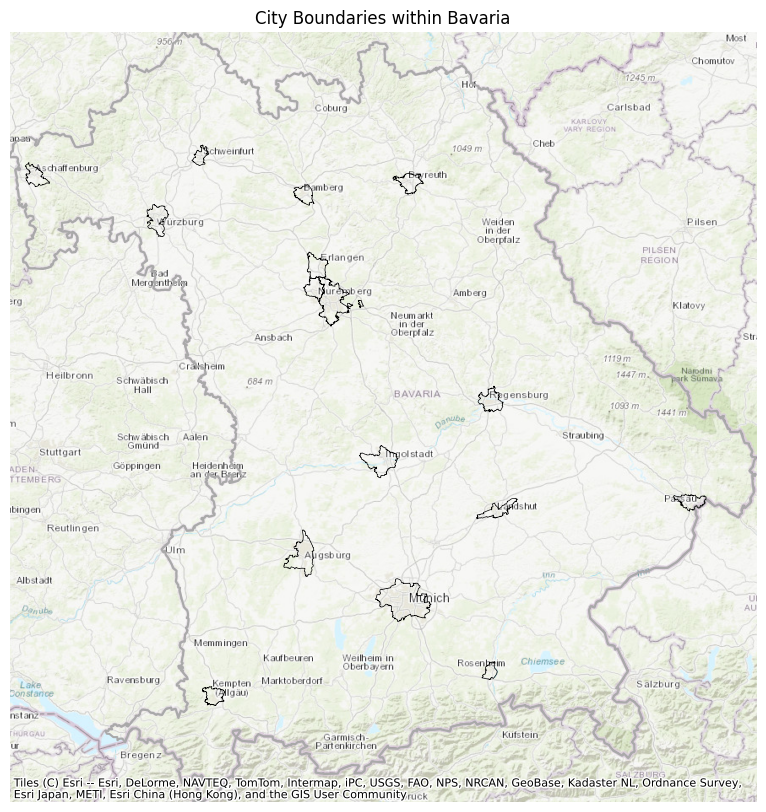

In [ ]:
import matplotlib.pyplot as plt
import geopandas as gpd
import contextily as ctx
from matplotlib.path import Path
from matplotlib.patches import PathPatch
from shapely.geometry import MultiPolygon, Polygon

# Assuming 'staedte_grenzen' and 'bayern_grenze' GeoDataFrames are already loaded

# Ensure both GeoDataFrames are in a suitable projected CRS for accurate plotting with contextily
# Contextily works best with Web Mercator (EPSG:3857)
staedte_grenzen_projected = staedte_grenzen.to_crs(epsg=3857)
bayern_grenze_projected = bayern_grenze.to_crs(epsg=3857)


# Create a figure and axes for the plot
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# Plot the Bavaria boundary first to set the initial extent of the plot
# We plot it with a transparent facecolor as we will use its geometry for clipping
# Ensure the outline is still visible by plotting it again later or with a higher zorder if needed
bayern_boundary_plot = bayern_grenze_projected.plot(ax=ax, facecolor='none', edgecolor='darkgrey', linewidth=1.5)

# Plot the city boundaries on top of the Bavaria boundary
staedte_grenzen_projected.plot(ax=ax, facecolor='none', edgecolor='black', linewidth=0.5)

# Set the axes limits explicitly to the extent of the Bavaria boundary
xmin, ymin, xmax, ymax = bayern_grenze_projected.total_bounds
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)

# Add the basemap
# Contextily should now use the updated axes limits for clipping
ctx.add_basemap(ax, source=ctx.providers.Esri.WorldTopoMap, crs=staedte_grenzen_projected.crs)

# Create a clipping path from the Bavaria boundary geometry
# Assuming bayern_grenze_projected has only one feature (the Bavaria boundary)
bavaria_geometry = bayern_grenze_projected.geometry.iloc[0]

# Function to convert a Shapely Polygon or MultiPolygon to a Matplotlib Path
def geometry_to_path(geometry):
    if geometry.geom_type == 'Polygon':
        polygons = [geometry]
    elif geometry.geom_type == 'MultiPolygon':
        polygons = list(geometry.geoms)
    else:
        raise ValueError("Input must be a Polygon or MultiPolygon")

    all_vertices = []
    all_codes = []

    for polygon in polygons:
        # Exterior ring
        exterior = polygon.exterior
        all_vertices.extend(exterior.coords)
        all_codes.extend([Path.MOVETO] + [Path.LINETO] * (len(exterior.coords) - 2) + [Path.CLOSEPOLY])

        # Interior rings (holes)
        for interior in polygon.interiors:
            all_vertices.extend(interior.coords)
            all_codes.extend([Path.MOVETO] + [Path.LINETO] * (len(interior.coords) - 2) + [Path.CLOSEPOLY])

    return Path(all_vertices, all_codes)

# Create a compound path from the Bavaria geometry
bavaria_path = geometry_to_path(bavaria_geometry)

# Create a PathPatch from the path
patch = PathPatch(bavaria_path, transform=ax.transData)

# Set the clipping path for the axes
ax.set_clip_path(patch)


# Set the title of the map
ax.set_title('City Boundaries within Bavaria')

# Remove axes
ax.set_axis_off()

# Display the plot
plt.show()

# Temperatur-Boxplots für Hotspots und Cold Spots

Ergebnisse der Gi Analyse laden mit Cold Spots und Hot Spots

In [ ]:
gi_results_path = "/content/drive/MyDrive/Cold Spots Bayern/Gi_Ergebnisse_2019_2024_Puffer"

In [ ]:
import os
import geopandas as gpd

# Assuming gi_results_path is already defined and contains the path to the directory
# gi_results_path = "/content/drive/MyDrive/Cold Spots Bayern/Gi_Ergebnisse_2019_2024_Puffer"

# Dictionary to store the loaded data
gi_results_data = {}

# List files in the directory
try:
    files_in_directory = os.listdir(gi_results_path)
    print(f"Found {len(files_in_directory)} files in the directory.")

    # Iterate through the files and load them
    for filename in files_in_directory:
        file_path = os.path.join(gi_results_path, filename)
        # Construct a key for the dictionary (e.g., filename without extension)
        file_key = os.path.splitext(filename)[0]

        # Attempt to read the file using geopandas
        try:
            # Assuming the files are in a format readable by geopandas (e.g., .geojson, .gpkg, .shp)
            gdf = gpd.read_file(file_path)
            gi_results_data[file_key] = gdf
            print(f"Successfully loaded {filename} into gi_results_data['{file_key}']")
        except Exception as e:
            print(f"Could not read {filename}: {e}")
            # You might want to skip or handle files that cannot be read

    print("\nFinished loading data into gi_results_data dictionary.")
    print(f"Dictionary keys: {list(gi_results_data.keys())}")

except FileNotFoundError:
    print(f"Error: Directory not found at {gi_results_path}")
except Exception as e:
    print(f"An error occurred: {e}")

# You can now access the loaded GeoDataFrames using the dictionary keys
# Example: accessing a GeoDataFrame named 'some_file'
# if 'some_file' in gi_results_data:
#     display(gi_results_data['some_file'].head())

Found 16 files in the directory.
Successfully loaded Augsburg_2019_2024_gi_star_2019_results.gpkg into gi_results_data['Augsburg_2019_2024_gi_star_2019_results']
Successfully loaded Bamberg_2019_2024_gi_star_2019_results.gpkg into gi_results_data['Bamberg_2019_2024_gi_star_2019_results']
Successfully loaded Bayreuth_2019_2024_gi_star_2019_results.gpkg into gi_results_data['Bayreuth_2019_2024_gi_star_2019_results']
Successfully loaded Erlangen_2019_2024_gi_star_2019_results.gpkg into gi_results_data['Erlangen_2019_2024_gi_star_2019_results']
Successfully loaded Fürth_2019_2024_gi_star_2019_results.gpkg into gi_results_data['Fürth_2019_2024_gi_star_2019_results']
Successfully loaded Ingolstadt_2019_2024_gi_star_2019_results.gpkg into gi_results_data['Ingolstadt_2019_2024_gi_star_2019_results']
Successfully loaded Kempten_(Allgäu)_2019_2024_gi_star_2019_results.gpkg into gi_results_data['Kempten_(Allgäu)_2019_2024_gi_star_2019_results']
Successfully loaded Landshut_2019_2024_gi_star_2

Boxplots jeder Stadt Cold Spot vs Hot Spot => LST-Verteilung

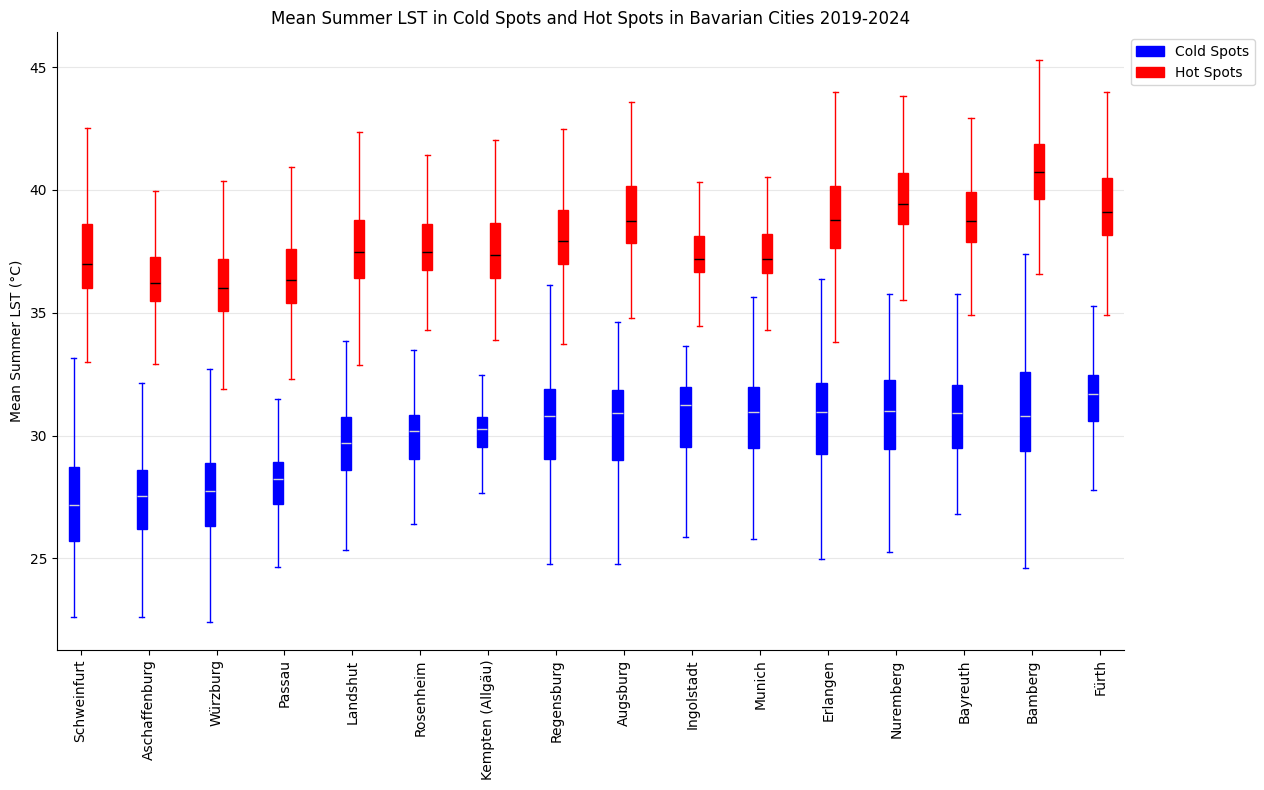

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming gi_results_data dictionary is already populated with GeoDataFrames

# Define significance level for identifying hot/cold spots
significance_level = 0.01 # Equivalent to 99% confidence

# Dictionary to store LST values for cold and hot spots per city
city_lst_data = {}

# Iterate through each city's GeoDataFrame in the dictionary
for city_name, gdf in gi_results_data.items():
    # Ensure the necessary columns exist
    if 'avg_summer_LST_Celsius' in gdf.columns and 'gi_star_p_sim' in gdf.columns and 'gi_star_classification' in gdf.columns:

        # Filter for statistically significant results based on the p-value
        significant_gdf = gdf[gdf['gi_star_p_sim'] <= significance_level]

        # Filter for cold spots (significant and classified as 'Cold Spot')
        cold_spots_gdf = significant_gdf[significant_gdf['gi_star_classification'] == 'Cold Spot']
        cold_spots_lst = cold_spots_gdf['avg_summer_LST_Celsius'].dropna().tolist()

        # Filter for hot spots (significant and classified as 'Hot Spot')
        hot_spots_gdf = significant_gdf[significant_gdf['gi_star_classification'] == 'Hot Spot']
        hot_spots_lst = hot_spots_gdf['avg_summer_LST_Celsius'].dropna().tolist()


        # Store the LST values
        city_lst_data[city_name] = {
            'Cold Spots': cold_spots_lst,
            'Hot Spots': hot_spots_lst
        }

    else:
        print(f"Skipping {city_name}: Missing required columns (avg_summer_LST_Celsius, gi_star_p_sim, gi_star_classification)")

# Prepare data for plotting and calculate mean LST for sorting
cities = []
cold_spots_data = []
hot_spots_data = []
labels = []
mean_cold_lst = {}

for city in city_lst_data:
    if city_lst_data[city]['Cold Spots'] or city_lst_data[city]['Hot Spots']:
        cities.append(city)
        cold_spots_data.append(city_lst_data[city]['Cold Spots'])
        hot_spots_data.append(city_lst_data[city]['Hot Spots'])
        labels.append(city.replace('_2019_2024_gi_star_2019_results', '')) # Clean up city names for labels

        # Calculate mean LST for cold spots (handle cases with no cold spots)
        if city_lst_data[city]['Cold Spots']:
            mean_cold_lst[city] = np.mean(city_lst_data[city]['Cold Spots'])
        else:
            mean_cold_lst[city] = float('inf') # Assign a large value to cities with no cold spots so they appear at the end

# Sort cities based on the mean cold spot LST
sorted_cities = sorted(mean_cold_lst, key=mean_cold_lst.get)

# Reorder data and labels based on the sorted cities
sorted_cold_spots_data = [city_lst_data[city]['Cold Spots'] for city in sorted_cities]
sorted_hot_spots_data = [city_lst_data[city]['Hot Spots'] for city in sorted_cities]
sorted_labels = [city.replace('_2019_2024_gi_star_2019_results', '').replace("_", " ") for city in sorted_cities]


# Create the boxplots
fig, ax = plt.subplots(1, 1, figsize=(15, 8)) # Adjust figure size as needed

# Set the positions for the boxplots
positions_cold = np.arange(len(sorted_cities)) * 2 - 0.2 # Position for cold spots
positions_hot = np.arange(len(sorted_cities)) * 2 + 0.2  # Position for hot spots

# Create boxplots for cold spots
bp_cold = ax.boxplot(sorted_cold_spots_data, positions=positions_cold, widths=0.3, patch_artist=True, boxprops=dict(facecolor='blue', color='blue'),
                     medianprops=dict(color='lightgrey'), whiskerprops=dict(color='blue'), capprops=dict(color='blue'), showfliers=False)

# Create boxplots for hot spots
bp_hot = ax.boxplot(sorted_hot_spots_data, positions=positions_hot, widths=0.3, patch_artist=True, boxprops=dict(facecolor='red', color='red'),
                    medianprops=dict(color='black'), whiskerprops=dict(color='red'), capprops=dict(color='red'), showfliers=False)

# Set x-axis labels and ticks
ax.set_xticks(np.arange(len(sorted_cities)) * 2)
ax.set_xticklabels(sorted_labels, rotation=90) # Rotate labels vertically

# Set y-axis label
ax.set_ylabel('Mean Summer LST (°C)')

# Set title
ax.set_title('Mean Summer LST in Cold Spots and Hot Spots in Bavarian Cities 2019-2024')

# Add a legend
ax.legend([bp_cold["boxes"][0], bp_hot["boxes"][0]], ['Cold Spots', 'Hot Spots'], loc='upper left', bbox_to_anchor=(1, 1))


# Add grid lines for better readability
ax.yaxis.grid(True, linestyle='-', which='major', color='lightgrey', alpha=0.5)

# Remove plot frame (spines)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Adjust layout to prevent labels overlapping
plt.tight_layout(rect=[0, 0, 0.85, 1]) # Adjust tight_layout to make space for the legend

# Display the plot
plt.show()

# violin plot

/tmp/ipython-input-1928243679.py:39: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(city_order, rotation=90) # Rotate labels vertically


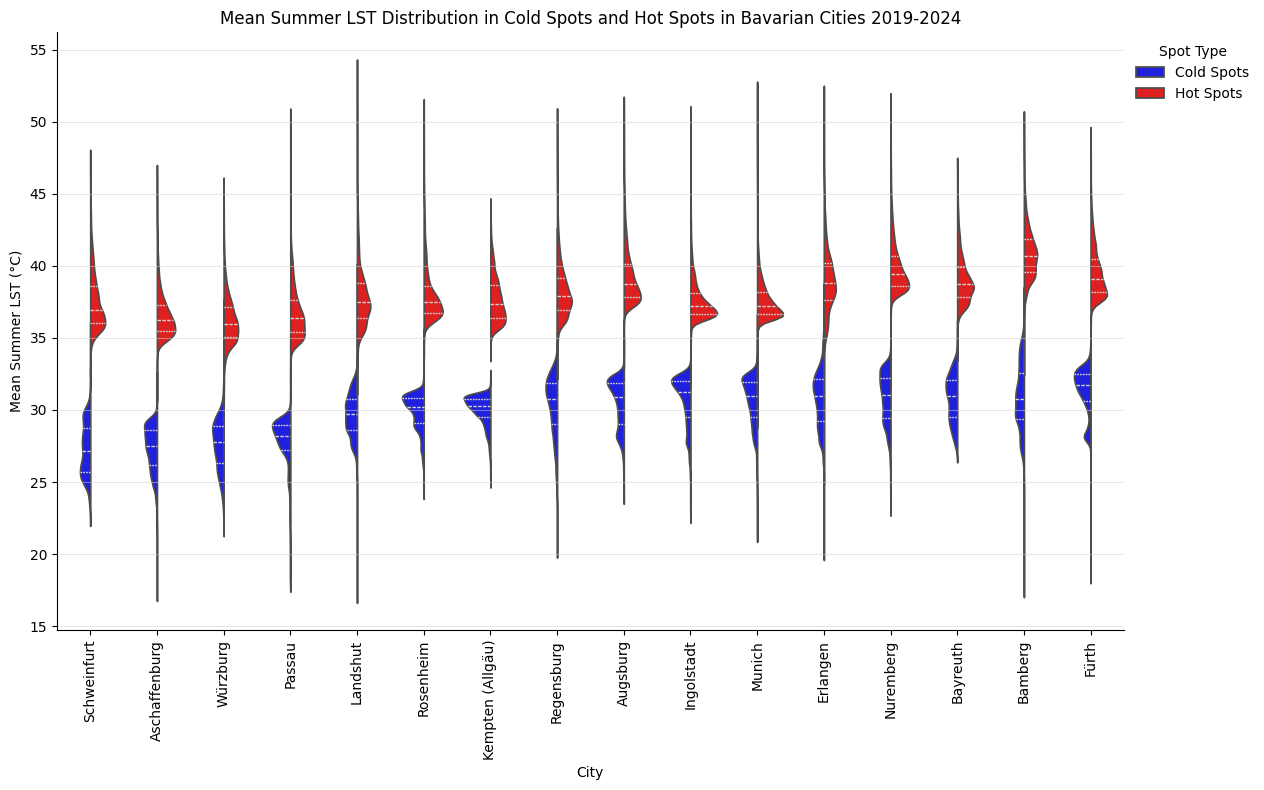

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Prepare data for violin plots. Seaborn's violinplot works well with long-form data.
# We need a DataFrame with columns for City, Spot Type (Cold/Hot), and LST.

violin_data = []

for city_name, lst_data in city_lst_data.items():
    cleaned_city_name = city_name.replace('_2019_2024_gi_star_2019_results', '').replace("_", " ")
    for lst in lst_data['Cold Spots']:
        violin_data.append({'City': cleaned_city_name, 'Spot Type': 'Cold Spots', 'LST': lst})
    for lst in lst_data['Hot Spots']:
        violin_data.append({'City': cleaned_city_name, 'Spot Type': 'Hot Spots', 'LST': lst})

violin_df = pd.DataFrame(violin_data)

# Ensure the order of cities is the same as in the boxplot for consistency
# We can use the sorted_labels list generated in the previous cell
city_order = sorted_labels
violin_df['City'] = pd.Categorical(violin_df['City'], categories=city_order, ordered=True)
violin_df = violin_df.sort_values('City')


# Create the violin plots
fig, ax = plt.subplots(1, 1, figsize=(15, 8)) # Adjust figure size as needed

# Define keyword arguments for the inner lines
inner_line_kws = {'color': 'lightgrey', 'linestyle': '--', 'linewidth': 1}

# Use seaborn's violinplot with split=True and inner_kws
sns.violinplot(x='City', y='LST', hue='Spot Type', data=violin_df, ax=ax, split=True, inner='quart',
               palette={'Cold Spots': 'blue', 'Hot Spots': 'red'}, order=city_order, hue_order=['Cold Spots', 'Hot Spots'],
               inner_kws=inner_line_kws)

# After plotting with seaborn, the ticks are usually set. We can now safely set the labels.
ax.set_xticklabels(city_order, rotation=90) # Rotate labels vertically


# Set y-axis label
ax.set_ylabel('Mean Summer LST (°C)')

# Set title
ax.set_title('Mean Summer LST Distribution in Cold Spots and Hot Spots in Bavarian Cities 2019-2024')

# Add a legend (seaborn often adds one automatically, but we can customize it)
ax.legend(title='Spot Type', loc='upper left', bbox_to_anchor=(1, 1), frameon=False)

# Add grid lines for better readability
ax.yaxis.grid(True, linestyle='-', which='major', color='lightgrey', alpha=0.5)

# Remove plot frame (spines)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


# Adjust layout to prevent labels overlapping
plt.tight_layout(rect=[0, 0, 0.85, 1]) # Adjust tight_layout to make space for the legend


# Display the plot
plt.show()

Städte sortiert nach Mittelwert der Cold Spots (aufsteigend)